In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv('AirQualityUCI.csv', sep = ";", usecols = ['Date', 'Time', 'NOx(GT)'], parse_dates = ['Date'])
data = data.loc[:9356,:]
yearlyNOx = data.groupby('Date')['NOx(GT)'].mean()
yearlyNOx = pd.DataFrame(yearlyNOx)
yearlyNOx.reset_index(inplace = True)

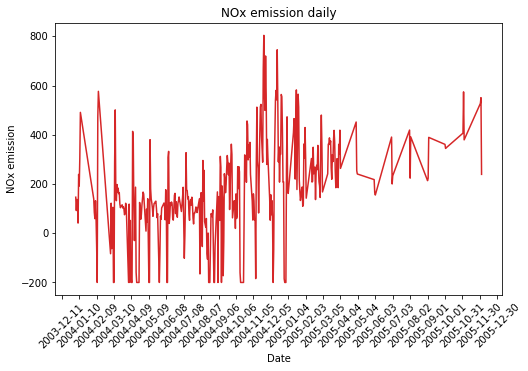

In [34]:
fig, ax = plt.subplots(1,1, figsize = (8,5))
ax.set(title='NOx emission daily', xlabel='Date', ylabel='NOx emission')
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.xaxis.set_tick_params(rotation=45)

ax.plot(yearlyNOx['Date'], yearlyNOx['NOx(GT)'], color='tab:red')

In [41]:
yearlyNOx.set_index('Date')
data = yearlyNOx['NOx(GT)']
result = adfuller(data)
print('P-value according to adfuler test:', result[1])

P-value according to adfuler test: 0.35295385185094696


P-value according to adfuler test: 0.35295385185094696
P-value according to adfuler test: 8.95903190787261e-16


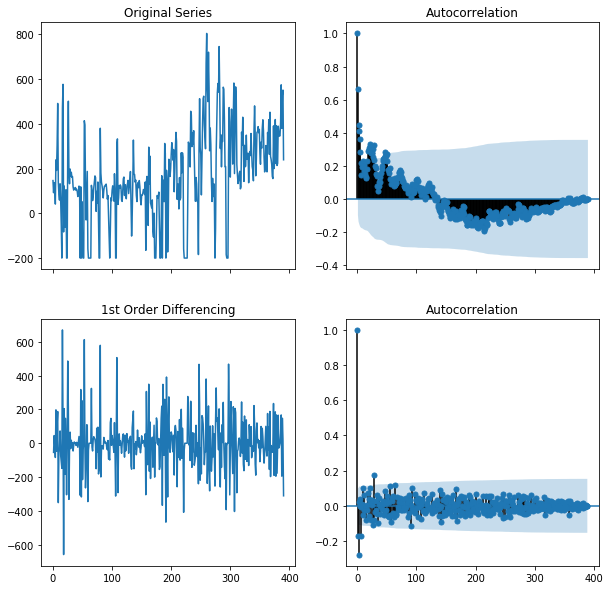

In [51]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,10))
axes[0, 0].plot(data); axes[0, 0].set_title('Original Series')
plot_acf(data, ax=axes[0, 1])
result = adfuller(data)
print('P-value according to adfuler test:', result[1])

#1st Differencing
axes[1, 0].plot(data.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.diff().dropna(), ax=axes[1, 1])
result = adfuller(data.diff().dropna())
print('P-value according to adfuler test:', result[1])

plt.show()

/Users/anuragsengupta/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


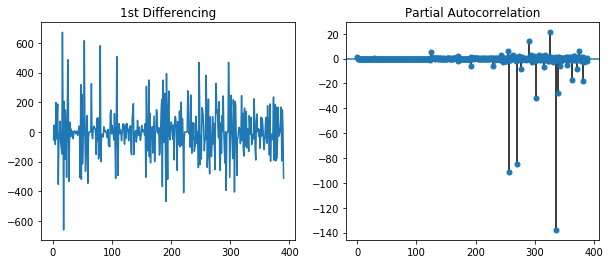

In [57]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].plot(data.diff().dropna()); axes[0].set_title('1st Differencing')
plot_pacf(data.diff().dropna(), ax=axes[1])

plt.show()

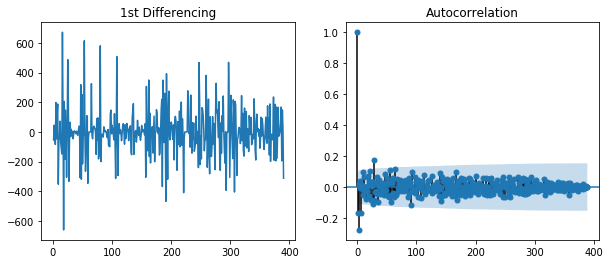

In [59]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].plot(data.diff().dropna()); axes[0].set_title('1st Differencing')
plot_acf(data.diff().dropna(), ax=axes[1])

plt.show()

In [85]:
p_values = [0,1,2,3,4,5,6,7]
q_values = [0,1,2,3,4,5,6,7]

In [91]:
data_size = len(data)
train_size = int(0.8*data_size)
train = data[:train_size]
test = data[train_size:]

In [92]:
for p in p_values:
    for q in q_values:
        try:
            model_train = ARIMA(train, order = (p,2,q))
            model_train_fit = model_train.fit(disp=-1)
            print("Value of p:", p, "Value of q:", q)
            print("AIC Value:", model_train_fit.aic)
        except:
            continue

Value of p: 0 Value of q: 0
AIC Value: 4321.665353580069
Value of p: 0 Value of q: 1
AIC Value: 4072.268329376285
Value of p: 1 Value of q: 0
AIC Value: 4258.891763945967
Value of p: 2 Value of q: 0
AIC Value: 4181.125452796743
Value of p: 2 Value of q: 1
AIC Value: 4034.068458988742
Value of p: 2 Value of q: 4
AIC Value: 4012.9625278405338
Value of p: 3 Value of q: 0
AIC Value: 4136.714255109137
Value of p: 3 Value of q: 1
AIC Value: 4032.0207626552638
Value of p: 3 Value of q: 2
AIC Value: 4005.086804138971
Value of p: 3 Value of q: 4
AIC Value: 4005.0393520582393
Value of p: 4 Value of q: 0
AIC Value: 4115.485401568101
Value of p: 4 Value of q: 1
AIC Value: 4033.4472363983327
Value of p: 4 Value of q: 2
AIC Value: 4035.491048457879
Value of p: 4 Value of q: 3
AIC Value: 4033.2681622902505
Value of p: 4 Value of q: 4
AIC Value: 4015.8932470216505
Value of p: 5 Value of q: 0
AIC Value: 4099.519730596137
Value of p: 5 Value of q: 1
AIC Value: 4034.681575390278
Value of p: 5 Value of q:

In [93]:
model_train = ARIMA(train, order = (3,2,4))
model_train_fit = model_train.fit(disp=-1)
print(model_train_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D2.NOx(GT)   No. Observations:                  310
Model:                 ARIMA(3, 2, 4)   Log Likelihood               -1993.520
Method:                       css-mle   S.D. of innovations            145.792
Date:                Mon, 20 Apr 2020   AIC                           4005.039
Time:                        14:31:55   BIC                           4038.669
Sample:                             2   HQIC                          4018.483
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0154      0.005      3.182      0.002       0.006       0.025
ar.L1.D2.NOx(GT)    -0.9703      0.051    -19.058      0.000      -1.070      -0.871
ar.L2.D2.NOx(GT)    -0.0757 

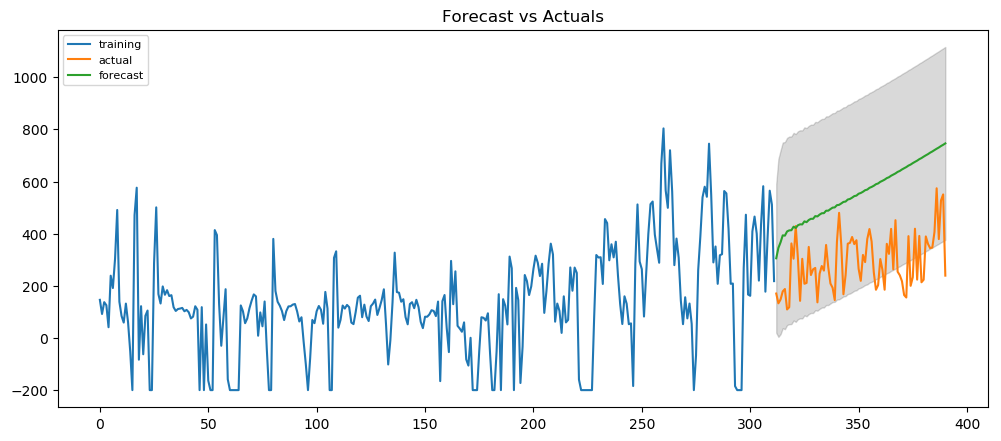

In [94]:
# Forecast
fc, se, conf = model_train_fit.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [101]:
for p in p_values:
    for q in q_values:
        try:
            model_train = SARIMAX(train, order = (p,2,q), seasonal_order = (p,2,q,18))
            model_train_fit = model_train.fit(disp=-1)
            print("Value of p:", p, "Value of q:", q)
            print("AIC Value:", model_train_fit.aic)
        except:
            print("Exception ocuured")
            continue

Value of p: 0 Value of q: 0
AIC Value: 4262.229656785959
Exception ocuured
Exception ocuured
Exception ocuured
Exception ocuured
Exception ocuured
Exception ocuured
Exception ocuured
Value of p: 1 Value of q: 0
AIC Value: 4039.1289213246464
Value of p: 1 Value of q: 1
AIC Value: 3754.1240808799257
Exception ocuured
Exception ocuured
Exception ocuured
Exception ocuured
Exception ocuured
Exception ocuured
Value of p: 2 Value of q: 0
AIC Value: 3922.1061849312528
Value of p: 2 Value of q: 1
AIC Value: 3714.7120100819307
Value of p: 2 Value of q: 2
AIC Value: 3853.3932441641564
Exception ocuured
Exception ocuured
Exception ocuured
Exception ocuured
Exception ocuured
Value of p: 3 Value of q: 0
AIC Value: 3833.3944668468175
Value of p: 3 Value of q: 1
AIC Value: 3701.9546894713803
Value of p: 3 Value of q: 2
AIC Value: 3818.5143752946733
Value of p: 3 Value of q: 3
AIC Value: 3888.8709838819304
Exception ocuured
Exception ocuured
Exception ocuured
Exception ocuured
Value of p: 4 Value of q:

In [107]:
model_train = SARIMAX(train, order = (3,2,1), seasonal_order = (3,2,1,12))
model_train_fit = model_train.fit(disp=-1)
print(model_train_fit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                            NOx(GT)   No. Observations:                  312
Model:             SARIMAX(3, 2, 1)x(3, 2, 1, 12)   Log Likelihood               -1920.052
Date:                            Mon, 20 Apr 2020   AIC                           3858.103
Time:                                    20:33:58   BIC                           3891.007
Sample:                                         0   HQIC                          3871.292
                                            - 312                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2343      0.062     -3.802      0.000      -0.355      -0.114
ar.L2         -0.3658      0.059   

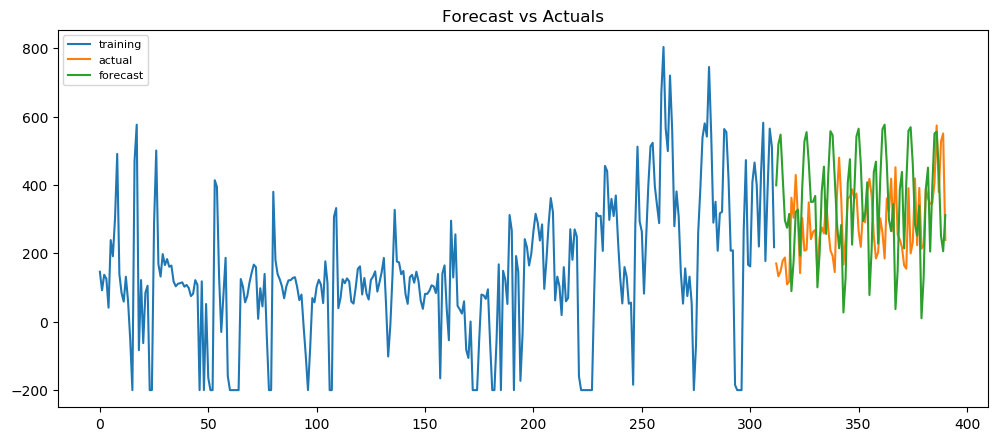

In [108]:
# Forecast
fc = model_train_fit.predict(start = train_size, end = len(data), dynamic=True)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
#                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [142]:
dataframe = pd.DataFrame(data)
scaler = MinMaxScaler(feature_range=(0, 1))
dataframe = scaler.fit_transform(dataframe)

In [143]:
train_size = int(len(dataframe) * 0.8)
test_size = len(dataframe) - train_size
train, test = dataframe[0:train_size,:], dataframe[train_size:len(dataframe),:]
print(len(train), len(test))

312 79


In [144]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [145]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [146]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [147]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Train on 310 samples
Epoch 1/20
310/310 - 1s - loss: 0.0492
Epoch 2/20
310/310 - 0s - loss: 0.0285
Epoch 3/20
310/310 - 0s - loss: 0.0266
Epoch 4/20
310/310 - 0s - loss: 0.0254
Epoch 5/20
310/310 - 0s - loss: 0.0248
Epoch 6/20
310/310 - 0s - loss: 0.0243
Epoch 7/20
310/310 - 0s - loss: 0.0239
Epoch 8/20
310/310 - 0s - loss: 0.0237
Epoch 9/20
310/310 - 0s - loss: 0.0237
Epoch 10/20
310/310 - 0s - loss: 0.0236
Epoch 11/20
310/310 - 0s - loss: 0.0235
Epoch 12/20
310/310 - 0s - loss: 0.0237
Epoch 13/20
310/310 - 0s - loss: 0.0234
Epoch 14/20
310/310 - 0s - loss: 0.0235
Epoch 15/20
310/310 - 0s - loss: 0.0235
Epoch 16/20
310/310 - 0s - loss: 0.0235
Epoch 17/20
310/310 - 0s - loss: 0.0236
Epoch 18/20
310/310 - 0s - loss: 0.0234
Epoch 19/20
310/310 - 0s - loss: 0.0235
Epoch 20/20
310/310 - 0s - loss: 0.0234


In [150]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 152.72 RMSE
Test Score: 110.85 RMSE


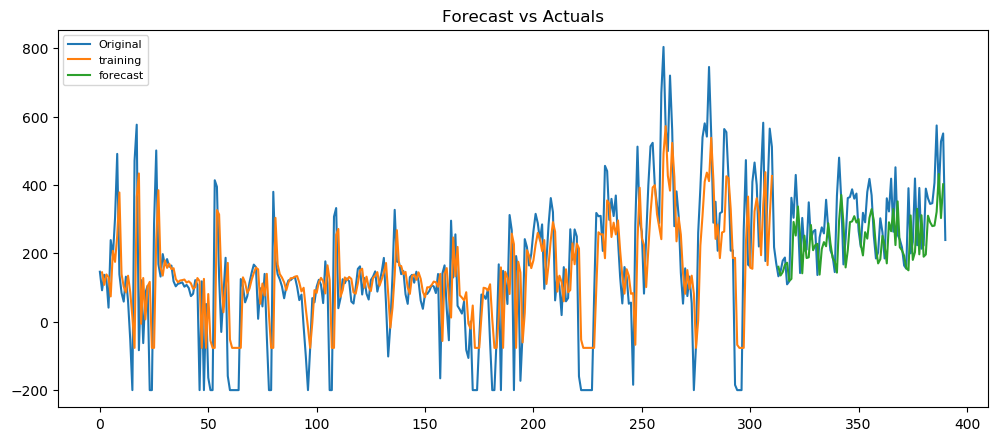

In [153]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataframe)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(12,5), dpi=100)
plt.plot(scaler.inverse_transform(dataframe), label='Original')
plt.plot(trainPredictPlot, label='training')
plt.plot(testPredictPlot, label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

plt.show()